# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **Shift + Enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of Python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

## Implementing Trading with Machine Learning Regression -Part-1
 In the previous units, we have covered how to create a trading strategy with regression. The below flowchart represents the steps involved in implementing the trading strategy.
![flowchart](https://d2a032ejo53cab.cloudfront.net/Glossary/h1wfK3Mh/p-1.drawio.png)

In this notebook, we will learn to import the data, create indicators and define dependent and independent variables. The key steps are:
1. [Read GLD data](#read)
2. [Create Input Parameters](#input)
3. [Create X and y Datasets](#xy)

## Import the Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<a id='read'></a>
## Read GLD data

We have saved the Gold (GLD) ETF data of OHLC format in a CSV file `gold_prices.csv`.  You can read the file using the pandas `read_csv` method. 

This data is available in the last unit of this course, **Python Codes and Data**. You can also download the data from Yahoo! Finance.

In [2]:
# Read the data
gold_prices = pd.read_csv('../data_modules/gold_prices.csv',
                          parse_dates=['Date'], index_col='Date')
# Print dataframe
gold_prices.head()

,Open,High,Low,Close
Date,,,,
2013-04-15,136.000000,136.750000,130.509995,131.309998
2013-04-16,134.899994,135.110001,131.759995,132.800003
2013-04-17,133.809998,134.949997,132.320007,132.869995
2013-04-18,134.119995,135.309998,133.619995,134.300003
2013-04-19,136.000000,136.020004,134.600006,135.470001


Now we will check for the outliers by plotting `Close` column of `gold_prices`. One can use any column of choice but we are using `Close` for the reference.

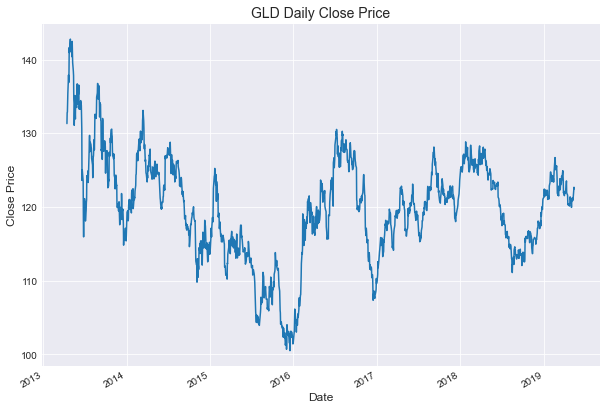

In [3]:
# Plot the closing price of GLD
gold_prices['Close'].plot(figsize=(10, 7))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title('GLD Daily Close Price', fontsize=14)
plt.show()

From the above plot we don't see any outliers. We will check for `NaN` values.

In [4]:
# Here we check for NaN values
gold_prices.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

Here we can clearly see our data has zero NaN values.
<a id='input'></a>
## Create Input Parameters

We will create custom indicators, which will help in making the prediction more accurate. 

1. `S_3`,`S_15`,`S_60`: 3-days, 15-days and 60-days moving average for GLD `Close` prices, respectively.
2. `Corr`: Compute the correlation between the `Close` price and `S_3`.
3. `Std_U`,`Std_D`: Difference between `High` & `Open`, `Open & Low` respectively.
4. `OD`, `OL`: Difference between `Open` & previous day's `Open`, and `Open` & previous day's `Close` respectively.



In [5]:
# Calculate 3-day moving average of close prices
gold_prices['S_3'] = gold_prices['Close'].shift(1).rolling(window=3).mean()

# Calculate 15-day moving average of close prices
gold_prices['S_15'] = gold_prices['Close'].shift(1).rolling(window=15).mean()

# Calculate 60-day moving average of close prices
gold_prices['S_60'] = gold_prices['Close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
gold_prices['Corr'] = gold_prices['Close'].shift(
    1).rolling(window=10).corr(gold_prices['S_3'].shift(1))

# Calculate the difference between High & Open, Open & Low
gold_prices['Std_U'] = gold_prices['High']-gold_prices['Open']
gold_prices['Std_D'] = gold_prices['Open']-gold_prices['Low']

# Calculate the difference between `Open` & previous day's `Open`, and `Open` & previous day's `Close`
gold_prices['OD'] = gold_prices['Open']-gold_prices['Open'].shift(1)
gold_prices['OL'] = gold_prices['Open']-gold_prices['Close'].shift(1)

gold_prices.tail()

,Open,High,Low,Close,S_3,S_15,S_60,Corr,Std_U,Std_D,OD,OL
Date,,,,,,,,,,,,
2019-05-08,121.540001,121.540001,120.769997,120.910004,120.890000,120.606668,122.611834,-0.221595,0.000000,0.770004,0.520004,0.330002
2019-05-09,120.959999,121.620003,120.860001,121.199997,120.976667,120.633335,122.567001,-0.290695,0.660004,0.099998,-0.580002,0.049995
2019-05-10,121.410004,121.730003,121.300003,121.430000,121.106667,120.694668,122.522667,-0.280418,0.319999,0.110001,0.450005,0.210007
2019-05-13,122.629997,122.849998,122.330002,122.669998,121.180000,120.765334,122.490334,0.078028,0.220001,0.299995,1.219993,1.199997
2019-05-14,122.599998,122.660004,122.120003,122.459999,121.766665,120.918667,122.467167,0.365089,0.060006,0.479995,-0.029999,-0.070000


<a id='xy'></a>
## Create X and y Datasets

A machine learning model's accuracy in making predictions depends on the kind of data provided to it.  
We will create an input dataset X and output datasets yU and yD for feeding into the linear regression model we are looking to build.
![image.png](https://d2a032ejo53cab.cloudfront.net/Glossary/HYKQtq2P/image.png)

In [6]:
# Independent variables
X = gold_prices[['Open', 'S_3', 'S_15', 'S_60', 'OD', 'OL', 'Corr']]
X.tail()

,Open,S_3,S_15,S_60,OD,OL,Corr
Date,,,,,,,
2019-05-08,121.540001,120.890000,120.606668,122.611834,0.520004,0.330002,-0.221595
2019-05-09,120.959999,120.976667,120.633335,122.567001,-0.580002,0.049995,-0.290695
2019-05-10,121.410004,121.106667,120.694668,122.522667,0.450005,0.210007,-0.280418
2019-05-13,122.629997,121.180000,120.765334,122.490334,1.219993,1.199997,0.078028
2019-05-14,122.599998,121.766665,120.918667,122.467167,-0.029999,-0.070000,0.365089


In [7]:
# Dependent variable for upward deviation
yU = gold_prices['Std_U']
yU.tail()

Date
2019-05-08    0.000000
2019-05-09    0.660004
2019-05-10    0.319999
2019-05-13    0.220001
2019-05-14    0.060006
Name: Std_U, dtype: float64

In [8]:
# Dependent variable for downward deviation
yD = gold_prices['Std_D']
yD.tail()

Date
2019-05-08    0.770004
2019-05-09    0.099998
2019-05-10    0.110001
2019-05-13    0.299995
2019-05-14    0.479995
Name: Std_D, dtype: float64

## Store the Data into CSV
Now we will store our input parameters for further analysis by saving our dataframe into an `input_parameters` csv file.

In [9]:
gold_prices.to_csv('input_parameters.csv', index = True)

## Conclusion
In this notebook we learned to create data indicators, dependent and independent variables.
In the next notebook, we will perform data preprocessing and predict high and low values of GLD prices using linear regression model. <br><br>